In [25]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from pyts.transformation import BagOfPatterns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Inspeccionar las claves dentro del archivo HDF5
with h5py.File("train.h5", "r") as f_train:
    print("Claves disponibles en el archivo 'train.h5':")
    for key in f_train.keys():
        print(key)

# Paso 2: Cargar los datos
with h5py.File("train.h5", "r") as f_train:
    X_train = np.stack([
        f_train['body_acc_x'][:],
        f_train['body_acc_y'][:],
        f_train['body_acc_z'][:],
        f_train['body_gyro_x'][:],
        f_train['body_gyro_y'][:],
        f_train['body_gyro_z'][:],
        f_train['total_acc_x'][:],
        f_train['total_acc_y'][:],
        f_train['total_acc_z'][:]
    ], axis=-1)
    y_train = np.array(f_train['y'])

with h5py.File("test.h5", "r") as f_test:
    X_test = np.stack([
        f_test['body_acc_x'][:],
        f_test['body_acc_y'][:],
        f_test['body_acc_z'][:],
        f_test['body_gyro_x'][:],
        f_test['body_gyro_y'][:],
        f_test['body_gyro_z'][:],
        f_test['total_acc_x'][:],
        f_test['total_acc_y'][:],
        f_test['total_acc_z'][:]
    ], axis=-1)

# Verificación
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)



Claves disponibles en el archivo 'train.h5':
body_acc_x
body_acc_y
body_acc_z
body_gyro_x
body_gyro_y
body_gyro_z
total_acc_x
total_acc_y
total_acc_z
y
X_train: (7352, 128, 9)
y_train: (7352,)
X_test: (2947, 128, 9)


C:\Users\u63055\AppData\Local\Temp\1\ipykernel_2768\2880500090.py:32: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  y_train = np.array(f_train['y'])


Matrices de confusión


Resultados de Matriz de confusión para SVM :
Accuracy: 0.9429
F1-score: 0.9429
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       247
         2.0       0.98      0.97      0.98       200
         3.0       0.96      0.99      0.98       206
         4.0       0.86      0.87      0.87       262
         5.0       0.88      0.87      0.87       276
         6.0       1.00      1.00      1.00       280

    accuracy                           0.94      1471
   macro avg       0.95      0.95      0.95      1471
weighted avg       0.94      0.94      0.94      1471



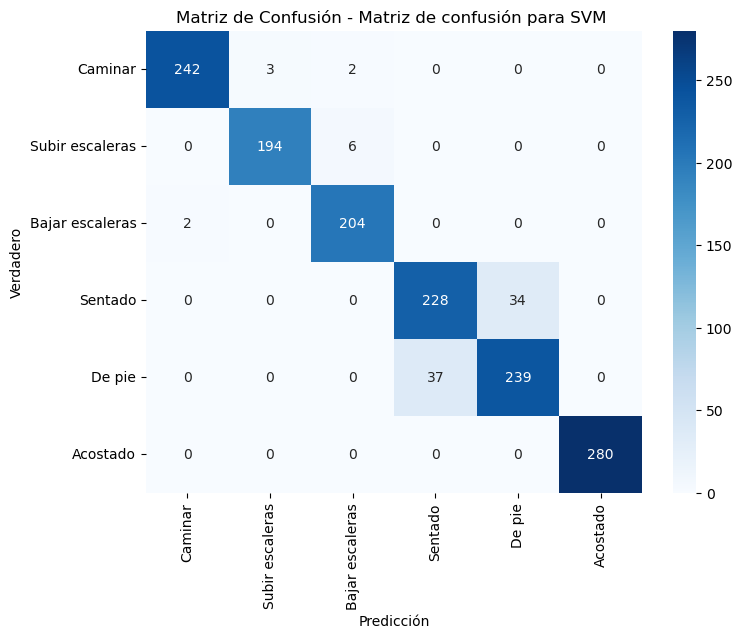


Resultados de Matriz de confusió para Random Forest:
Accuracy: 0.9633
F1-score: 0.9633
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       247
         2.0       0.93      0.96      0.95       200
         3.0       0.99      0.99      0.99       206
         4.0       0.94      0.95      0.95       262
         5.0       0.96      0.94      0.95       276
         6.0       1.00      1.00      1.00       280

    accuracy                           0.96      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



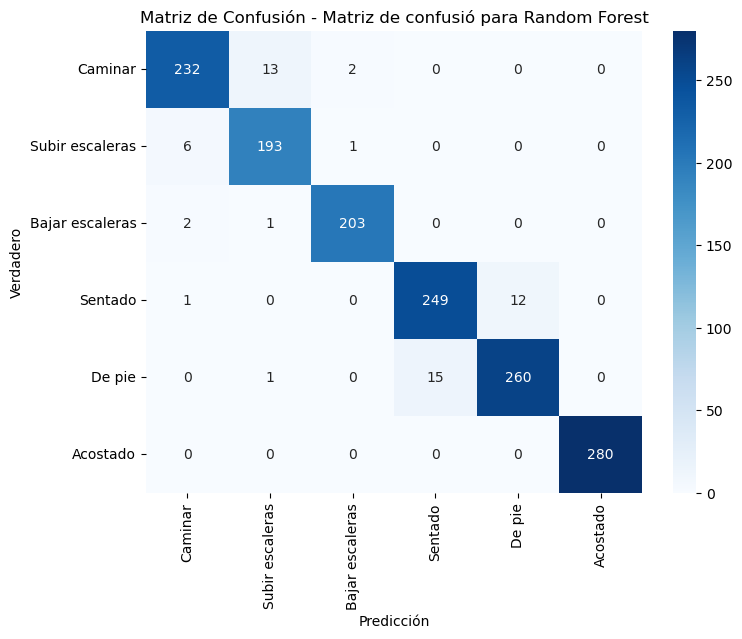

In [29]:
from sklearn.model_selection import train_test_split
from pyts.transformation import BagOfPatterns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Etiquetas legibles
etiquetas = [
    "Caminar",         # 1
    "Subir escaleras", # 2
    "Bajar escaleras", # 3
    "Sentado",         # 4
    "De pie",          # 5
    "Acostado"         # 6
]

# Función para evaluar y mostrar resultados
def evaluar_modelo(nombre, y_val, y_pred):
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    print(f"\nResultados de {nombre}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_val, y_pred))
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()

# Aplanar los datos para incluir todos los canales
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Estandarización
scaler = StandardScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened)

# División train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flattened, y_train, test_size=0.2, random_state=42)

# Entrenar y evaluar modelos
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_split, y_train_split)
y_pred_svm = svm.predict(X_val_split)
evaluar_modelo("Matriz de confusión para SVM ", y_val_split, y_pred_svm)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_split, y_train_split)
y_pred_rf = rf.predict(X_val_split)
evaluar_modelo("Matriz de confusió para Random Forest", y_val_split, y_pred_rf)


Fronteras de decisión (decision boundary)

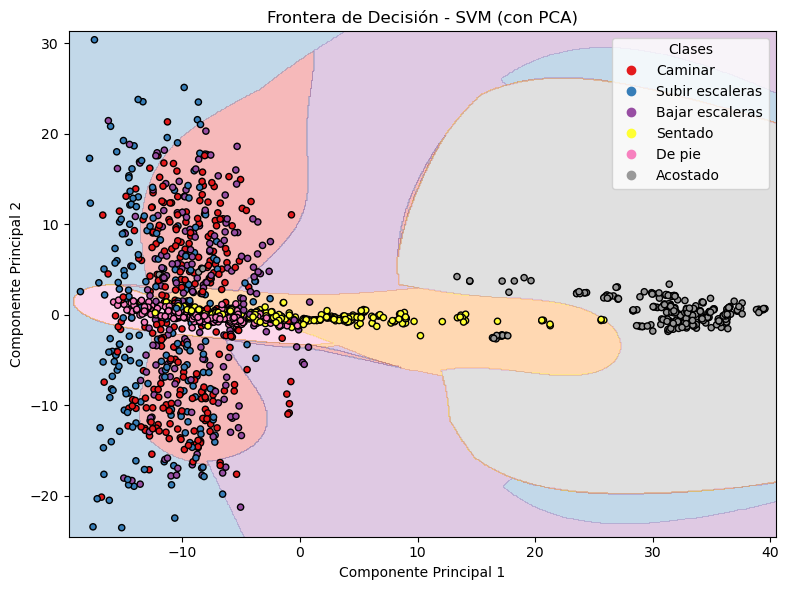

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# === Etiquetas legibles ===
etiquetas = [
    "Caminar",         # 1
    "Subir escaleras", # 2
    "Bajar escaleras", # 3
    "Sentado",         # 4
    "De pie",          # 5
    "Acostado"         # 6
]

# === PCA: reducir a 2 dimensiones para graficar ===
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val_split)

# === Entrenar SVM con datos reducidos ===
svm_pca = SVC(kernel='rbf', C=10, gamma='scale')
svm_pca.fit(X_train_pca, y_train_split)

# === Función para graficar frontera de decisión con etiquetas legibles ===
def plot_decision_boundary(model, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k', s=20)
    handles, _ = scatter.legend_elements(prop="colors")
    plt.legend(handles, etiquetas, title="Clases", loc="upper right")
    plt.title(title)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.tight_layout()
    plt.show()

# === Graficar frontera de decisión del SVM ===
plot_decision_boundary(svm_pca, X_val_pca, y_val_split, "Frontera de Decisión - SVM (con PCA)")


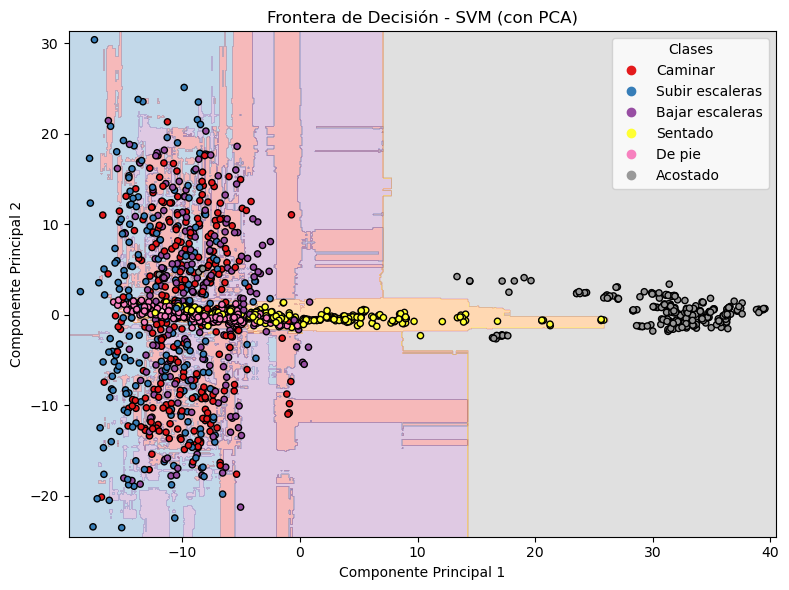

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# === Etiquetas legibles ===
etiquetas = [
    "Caminar",         # 1
    "Subir escaleras", # 2
    "Bajar escaleras", # 3
    "Sentado",         # 4
    "De pie",          # 5
    "Acostado"         # 6
]

# === PCA: reducir a 2 dimensiones para graficar ===
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val_split)

# === Entrenar SVM con datos reducidos ===
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train_split)

# === Función para graficar frontera de decisión con etiquetas legibles ===
def plot_decision_boundary(model, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k', s=20)
    handles, _ = scatter.legend_elements(prop="colors")
    plt.legend(handles, etiquetas, title="Clases", loc="upper right")
    plt.title(title)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.tight_layout()
    plt.show()

# === Graficar frontera de decisión del SVM ===
plot_decision_boundary(rf_pca, X_val_pca, y_val_split, "Frontera de Decisión - Random Forest (con PCA)")


Variación de accuracy según parámetros

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
max_C = list([0.1, 1, 10])
accuracies = []

for C1 in max_C:
    rf1 = SVC(kernel='rbf', C=C1, gamma='scale')
    rf1.fit(X_train_split, y_train_split)
    scores = cross_val_score(rf1, X_train_split, y_train_split, cv=5, scoring='accuracy').mean()
    accuracies.append(scores)

plt.figure(figsize=(10, 6))
plt.plot(max_C, accuracies, marker='o')
plt.title('Accuracy vs. Profundidad del Árbol')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Accuracy')
plt.xticks(max_C)
plt.grid()

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_split, y_train_split)

print("Mejores parámetros:", grid_search.best_params_)